In [1]:
import pandas as pd

df = pd.read_csv("tuik_tufe_long.csv")

df.head()

,Alt Kategori,Yıl,Ay,Endeks,Ay_Num,Tarih
0,(Gıda Ve Alkolsüz İçecekler),2005,Ocak,111.95,1,2005-01-01
1,"(Görsel-İşitsel Sistemle (Audıo-Vısual), Fotoğ...",2005,Ocak,91.10,1,2005-01-01
2,(Diğer Temel Dayanıklı Eğlence Ve Kültür Araçl...,2005,Ocak,115.83,1,2005-01-01
3,"(Diğer Eğlence Araçları Ve Malzemeleri, Bahçe ...",2005,Ocak,120.99,1,2005-01-01
4,(Eğlence Ve Kültür Hizmetleri),2005,Ocak,129.86,1,2005-01-01


In [2]:
df.columns

Index(['Alt Kategori', 'Yıl', 'Ay', 'Endeks', 'Ay_Num', 'Tarih'], dtype='object')

### Amaç : Yıllara Göre Ortalama TÜFE Değerini bulmak ve grafiğini çizmek.

In [3]:
yillik_ort_endeks = df.groupby("Yıl")["Endeks"].mean().reset_index()  #yıla göre endesk değerlerinin ortalamasını alıyoruz
yillik_ort_endeks.columns = ["Yıl","Ortalama_TUFE"]
yillik_ort_endeks.head()

#yıllık ortalama endeks hesaplamasını yapmış olduk

,Yıl,Ortalama_TUFE
0,2005,121.493977
1,2006,132.225980
2,2007,141.622485
3,2008,152.303874
4,2009,163.411901


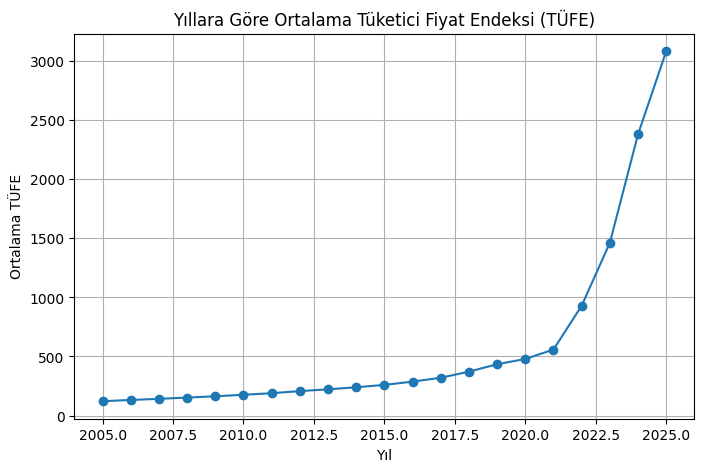

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(yillik_ort_endeks["Yıl"], yillik_ort_endeks["Ortalama_TUFE"], marker='o')  # line plot (çizgi grafiği)
plt.title("Yıllara Göre Ortalama Tüketici Fiyat Endeksi (TÜFE)")
plt.xlabel("Yıl")
plt.ylabel("Ortalama TÜFE")
plt.grid(True)
plt.show()

#çizgi grafiği ile yıllık ortalama TÜFE değerlerinin her yıl için gösterildiği bir grafik oluşturdum

Bu grafikte 2005 ile 2025 yılları arasında ortalama TÜFE (Tüketici Fiyat Endeksi) değerlerinin yıllar içinde sürekli olarak arttığı görülmektedir. Özellikle 2020 yılı civarında belirgin bir "dirsek (elbow)" noktası oluşmuş, bu noktadan itibaren TÜFE artış hızında kayda değer bir ivmelenme meydana gelmiştir. Bu durum, son yıllarda yaşanan ekonomik dalgalanmaların tüketici fiyatları üzerindeki etkisini yansıtmaktadır.

### Amaç : Yıllara Göre Ortalama TÜFE Artış Oranı

In [5]:
yillik_ort_endeks["Artış_Oranı"] = yillik_ort_endeks["Ortalama_TUFE"].pct_change() * 100   #yıla göre yüzdesel artışı hesaplayalım

yillik_ort_endeks.head()                                                   # yillik_ort_endeks["Ortalama_TUFE"] --> her yıl için ort. TÜFE değerini tutar
                                                                           # pct_change --> bu metod iki satır arasındaki oransal (yüzdesel) değişimi hesaplar 

,Yıl,Ortalama_TUFE,Artış_Oranı
0,2005,121.493977,NaN
1,2006,132.225980,8.833362
2,2007,141.622485,7.106399
3,2008,152.303874,7.542156
4,2009,163.411901,7.293331


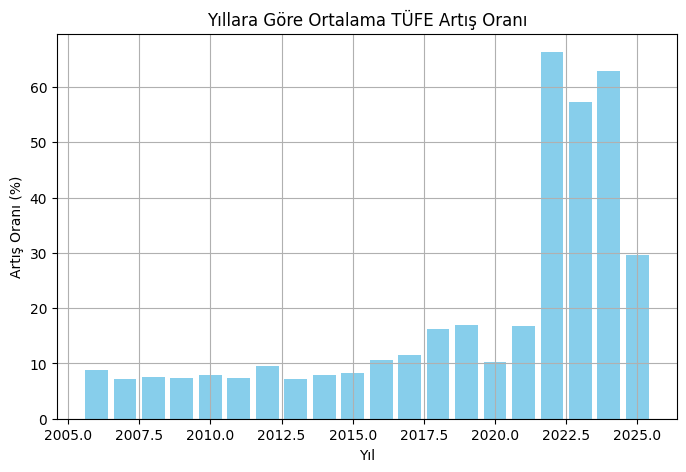

In [6]:
plt.figure(figsize=(8,5))
plt.bar(yillik_ort_endeks["Yıl"], yillik_ort_endeks["Artış_Oranı"], color= 'skyblue')   # bar plot
plt.title("Yıllara Göre Ortalama TÜFE Artış Oranı")
plt.xlabel("Yıl")
plt.ylabel("Artış Oranı (%)")
plt.grid(True)
plt.show()

#bar grafiği ile yıllara göre ort. TÜFE değerinin yüzdesel artış miktarını görselleştirdim

Bu grafikte, yıllar arasındaki ortalama TÜFE (Tüketici Fiyat Endeksi) değerlerinin yıllık yüzdesel artış oranları gösterilmektedir.
2005 yılı için artış oranı hesaplanamamıştır çünkü bir önceki yılın verisi bulunmamaktadır.
2022 yılına geçişte, özellikle 2021'de gözlemlenen dirsek noktasının ardından artış oranında keskin bir sıçrama dikkat çekmektedir.
Bu durum, ekonomik dalgalanmalara veya enflasyonist baskıların artmasına işaret ediyor olabilir.

In [7]:
# En yüksek artış oranı
en_yuksek = yillik_ort_endeks.loc[yillik_ort_endeks["Artış_Oranı"].idxmax()]
print(f"En yüksek artış oranı: {(en_yuksek['Yıl'])} yılında, oran: {en_yuksek['Artış_Oranı']:.2f} %")

# En düşük artış oranı
en_dusuk = yillik_ort_endeks.loc[yillik_ort_endeks["Artış_Oranı"].idxmin()]
print(f"En düşük artış oranı: {(en_dusuk['Yıl'])} yılında, oran: {en_dusuk['Artış_Oranı']:.2f} %")

                                                    # .idxmax(): Bu maksimum değerin hangi satırda (index'te) olduğunu verir.
                                                    # .loc[...]: O satırdaki "Yıl" bilgisini getirir.

# Artış oranlarının genel dalgalanması
std = yillik_ort_endeks["Artış_Oranı"].std()
print(f"Artış oranlarının standart sapması: {std:.2f}")   
                                                        # std değeri >>>Yüksekse → dalgalı grafik, oynak enflasyon.
                                                        #             Düşükse → istikrarlı bir artış var demektir.


En yüksek artış oranı: 2022.0 yılında, oran: 66.31 %
En düşük artış oranı: 2007.0 yılında, oran: 7.11 %
Artış oranlarının standart sapması: 19.46


En yüksek artış oranı, açıkça görüldüğü üzere 2022 yılında %66.31 olarak gerçekleşmiştir. Bu yıl, Türkiye ekonomisinde enflasyonun zirve yaptığı dönemlerden biridir. Döviz kuru şokları, tedarik zinciri problemleri ve genişlemeci para politikaları bu artışta etkili olmuştur.

Artış oranları sabit değil, oldukça dalgalıdır. Yıllık artış oranlarının standart sapması 19.46’dır, bu da fiyat değişimlerinin istikrarsız olduğunu ve ekonomik dalgalanmalardan etkilendiğini gösterir.

En düşük artış oranı ise 2007 yılında %7.11 olarak kaydedilmiştir. Bu dönem, görece fiyat istikrarının sağlandığı bir yıllık süreci işaret etmektedir. Ayrıca, küresel kriz öncesi dönemde uygulanan sıkı para politikalarının etkisi de bu düşük oranda rol oynamış olabilir.

### Harcama Kategorileri Enflasyon Analizi: En Çok Artan 10 Kategorinin Trend İncelemesi

In [8]:
# öncelikle harcama gruplarının yıllık ortalama TÜFE miktarlarını hesaplayacağız, yani " alt kategori"ve "yıl"  sütunlarına göre "endeks" değerlerinin ortalamasını.

kategori_yillik_ortalama = df.groupby(["Alt Kategori","Yıl"])["Endeks"].mean().reset_index()   #reset_index(): Gruplama sonrası oluşan çok seviyeli indexi tekrar düz hale getir
kategori_yillik_ortalama.head()

,Alt Kategori,Yıl,Endeks
0,(Alkollü İçecekler Ve Tütün),2005,135.184167
1,(Alkollü İçecekler Ve Tütün),2006,163.535833
2,(Alkollü İçecekler Ve Tütün),2007,179.765000
3,(Alkollü İçecekler Ve Tütün),2008,192.466667
4,(Alkollü İçecekler Ve Tütün),2009,216.937500


In [9]:
kategori_yillik_ortalama["Artış Oranı"] = kategori_yillik_ortalama.groupby("Alt Kategori")["Endeks"].pct_change() * 100
kategori_yillik_ortalama.head()      # burada her kategori için yıldan yıla değişim oranını hesaplıyoruz

,Alt Kategori,Yıl,Endeks,Artış Oranı
0,(Alkollü İçecekler Ve Tütün),2005,135.184167,NaN
1,(Alkollü İçecekler Ve Tütün),2006,163.535833,20.972624
2,(Alkollü İçecekler Ve Tütün),2007,179.765000,9.923921
3,(Alkollü İçecekler Ve Tütün),2008,192.466667,7.065706
4,(Alkollü İçecekler Ve Tütün),2009,216.937500,12.714323


In [10]:
kategori_yillik_ortalama_temiz = kategori_yillik_ortalama.dropna()    #başta buluna NaN değerlerini temizledik
kategori_ort_artis = kategori_yillik_ortalama_temiz.groupby("Alt Kategori")["Artış Oranı"].mean().sort_values(ascending=False)  #ve yıllar boyunca ort artış oranını hesaplayıp büyükten küçüğe sıralar
print("En çok artan 10 kategori: ")
kategori_ort_artis.head(10)         # her kategori için 2005-2025 arası artış miktarlarının ort değerlerini bulup en çok artan 10 kategoriyi buluyoruz

En çok artan 10 kategori: 


Alt Kategori
(Posta Hizmetleri)                                          25.429723
(Başka Yerde Sınıflandırılamayan Kişisel Bakım Ürünleri)    25.013802
(Yemek Hizmetleri)                                          23.483653
(Lokanta Ve Oteller)                                        22.903405
(Sigorta)                                                   22.350526
(Alkollü İçecekler)                                         22.179740
(Gerçek Kira)                                               22.034110
(Sosyal Hizmetler)                                          21.979989
(Gıda)                                                      21.657983
(Gıda Ve Alkolsüz İçecekler)                                21.529606
Name: Artış Oranı, dtype: float64

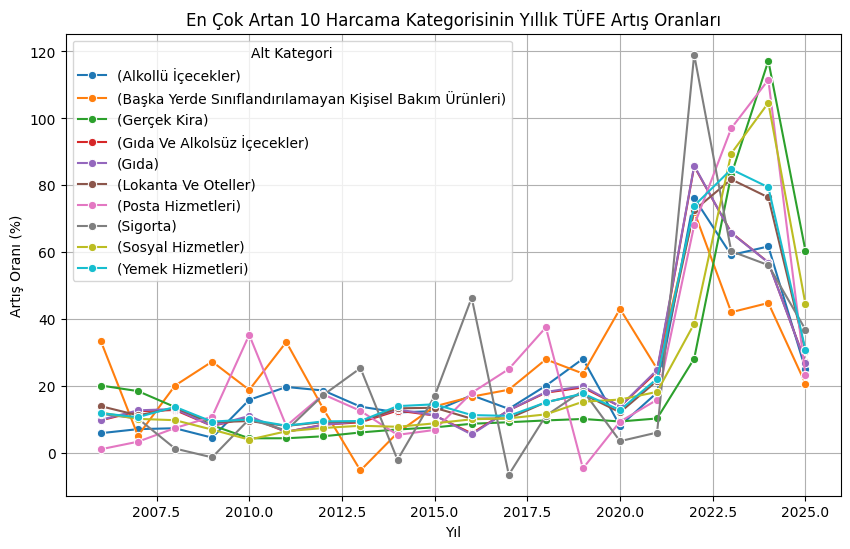

In [11]:
import seaborn as sns

plt.figure(figsize=(10,6))
top_10_kategoriler = kategori_ort_artis.head(10).index #en yüksek artış oranına sahip 10 kategoriyi seçer 
top_10_data = kategori_yillik_ortalama_temiz[kategori_yillik_ortalama_temiz["Alt Kategori"].isin(top_10_kategoriler)] #ve filtreler

sns.lineplot(data=top_10_data, x="Yıl", y="Artış Oranı", hue="Alt Kategori", marker="o") #her kategori için farklı renkli çizgi grafiği oluşturur
plt.title("En Çok Artan 10 Harcama Kategorisinin Yıllık TÜFE Artış Oranları")
plt.xlabel("Yıl")
plt.ylabel("Artış Oranı (%)")
plt.grid(True)
plt.show()

#burada lineplot ile bu 10 harcama kateogrisinin yıllar içerisindeki değişimini görselleştirdim

Grafikte Türkiye'nin en yüksek enflasyon yaşayan 10 harcama kategorisinin 2005-2025 dönemindeki yıllık artış oranları görülmektedir.
2005-2021 arası dönemde kategorilerin çoğu %0-40 bandında dalgalanarak görece istikrarlı bir seyir izlemiştir. Ancak 2021 yılından itibaren dramatik bir değişim yaşanmış, özellikle Sigorta (%120'ye yakın), Gerçek Kira, Sosyal Hizmetler ve Lokanta&Oteller kategorilerinde %80-100 seviyelerinde rekor artışlar kaydedilmiştir. 2022 yılı ise neredeyse tüm kategoriler için zirve yılı olmuş, Posta Hizmetleri ve Yemek Hizmetleri gibi kategoriler %100'ün üzerine çıkmıştır. 2023-2024 döneminde ise keskin bir düşüş yaşanarak kategoriler %20-60 bandına gerilemiştir. Bu grafik, Türkiye ekonomisinde yaşanan enflasyonist dönemin 2021-2022 yıllarında zirve yaptığını ve özellikle hizmet sektörü kategorilerinin (kira, lokanta, sigorta) en çok etkilendiğini açık şekilde göstermektedir.

### Amaç: TÜFE'de Mevsimsel Etkiler ve Aylık Patterns'lerin Belirlenmesi

In [12]:
aylik_genel_ortalama = df.groupby(["Ay"])["Endeks"].mean().reset_index()  #tüm yılların aylık ort endekslerini buluyoruz, yani mesela bu yıllardaki tüm aralık aylarının ortalaması
aylik_genel_ortalama.head(15)

,Ay,Endeks
0,Aralık,513.187233
1,Ağustos,476.307754
2,Ekim,498.382431
3,Eylül,489.844439
4,Haziran,578.731348
5,Kasım,505.390831
6,Mart,543.985956
7,Mayıs,566.099031
8,Nisan,555.597009
9,Ocak,521.564086


In [13]:
aylik_std = df.groupby(["Ay"])["Endeks"].std().reset_index() # burada da tüm yıllarların aylık standart sapmasını buluyoruz,yani her ayın yıllar içindeki dalgalanma miktarını ölçüyor
aylik_std.head(15)

,Ay,Endeks
0,Aralık,780.488139
1,Ağustos,718.269882
2,Ekim,756.563517
3,Eylül,743.518651
4,Haziran,953.269281
5,Kasım,767.955638
6,Mart,879.056435
7,Mayıs,924.991610
8,Nisan,902.336388
9,Ocak,826.901301


Standart sapma küçükse: O ayda yıllar boyunca TÜFE değerleri birbirine yakın, yani istikrarlı.

Standart sapma büyükse: O ayda yıllar arasında ciddi dalgalanmalar olmuş.

In [14]:
aylar = ['Ocak', 'Şubat', 'Mart', 'Nisan',
       'Mayıs', 'Haziran', 'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım',
       'Aralık']

fill_between şu mantıkla çalışıyor:

Ortalama değerin (aylik_genel_ortalama["Endeks"]) alt sınırını alıyoruz:
ortalama - standart_sapma

Ortalama değerin üst sınırını alıyoruz:
ortalama + standart_sapma

Bu iki sınır arasında kalan alanı gri bir gölge olarak çiziyoruz.

Bu sayede, her ay için TÜFE değerinin ortalama etrafında ne kadar değişkenlik gösterdiğini görmüş oluyoruz.

Gölge genişse → O ayın yıllar içinde değerleri çok dalgalanmış.

Gölge darsa → O ayın değerleri yıllar boyunca daha istikrarlı.

Yani fill_between tamamen "standart sapmanın görsel temsilini" yapmak için var.



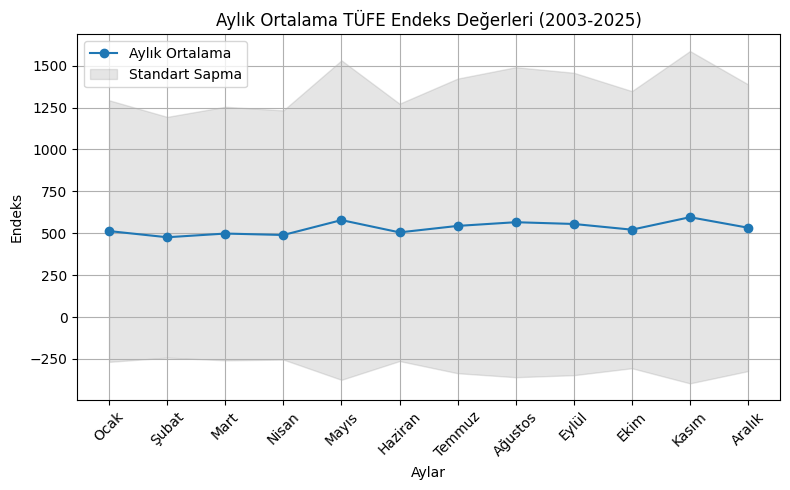

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(aylik_genel_ortalama["Ay"], aylik_genel_ortalama["Endeks"], marker='o', label='Aylık Ortalama')
plt.fill_between(aylik_genel_ortalama["Ay"],   # Standart sapma gölgesini oluşturuyoruz
                 aylik_genel_ortalama["Endeks"] - aylik_std["Endeks"],  #ort değerin alt snırını belirliyoruz
                 aylik_genel_ortalama["Endeks"] + aylik_std["Endeks"],  #ort değerin üst sınırını belirliyoruz    --> bu iki sınır aarasında kalan alan gri bölge olarak çizilecek
                 color='gray', alpha=0.2, label='Standart Sapma')       #bu işlemle birlikte her ay için TÜFE değerinin ort etrafında ne kadar değişkenlik gösterdiğini görebiliriz

plt.xticks(ticks=range(12), labels=aylar, rotation=45)  
plt.title("Aylık Ortalama TÜFE Endeks Değerleri (2003-2025)")         #Gölge genişse → O ayın yıllar içinde değerleri çok dalgalanmış.
plt.xlabel("Aylar")                                                   #Gölge darsa → O ayın değerleri yıllar boyunca daha istikrarlı.
plt.ylabel("Endeks")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Bu grafikte, tüm yıllar bir araya getirilerek her ayın ortalama TÜFE endeksi gösterilmiştir.

Yılın ortalarına doğru (özellikle Temmuz-Ağustos) endeks değerlerinde yükselme var. Bu, yaz döneminde artan harcama ve fiyat artışlarından kaynaklanıyor olabilir.

Ocak-Şubat aylarında değerler görece düşük.

Aralık ayında belirgin bir artış yerine daha dengeli bir seviye var.

Genel olarak yıl içinde TÜFE’nin mevsimsel olarak dalgalandığını söyleyebiliriz.

### Amaç: Gıda ve Sağlık Kategorileri Arasındaki İlişkiyi İncelemek

In [ ]:
df["Alt Kategori"].unique().tolist()  #sahip olunan alt kategorileri görebiliriz 

In [ ]:
gida_data = df[df["Alt Kategori"] == "(Gıda)"].copy()
saglik_data = df[df["Alt Kategori"] == "(Sağlık)"].copy() #gıda ve sağlık verilerini ayırdım

gida_yillik = gida_data.groupby("Yıl")["Endeks"].mean().reset_index()
saglik_yillik = saglik_data.groupby("Yıl")["Endeks"].mean().reset_index() #her ikisi için de yıllık ort değerlerini hesapladım

korelasyon_data = gida_yillik.merge(saglik_yillik, on="Yıl", suffixes=("_Gıda", "_Sağlık")) #iki veriyi yıl bazında birleştirelim
korelasyon_data.head()

,Yıl,Endeks_Gıda,Endeks_Sağlık
0,2005,111.685833,112.640833
1,2006,122.678333,116.952500
2,2007,138.230833,122.533333
3,2008,156.312500,123.035000
4,2009,168.870833,126.655833


In [ ]:
korelasyon = korelasyon_data["Endeks_Gıda"].corr(korelasyon_data["Endeks_Sağlık"])  # burada korelasyon katsayısını hesaplıyoruz
print(f"Gıda ve Sağlık Arasındaki Korelasyon: {korelasyon}")

if korelasyon > 0.7:
    print("Güçlü pozitif korelasyon var")
elif korelasyon > 0.3:
    print("Orta düzeyde pozitif korelasyon var")
else:
    print("Zayıf korelasyon var")        

Gıda ve Sağlık Arasındaki Korelasyon: 0.9973738081485638
Güçlü pozitif korelasyon var


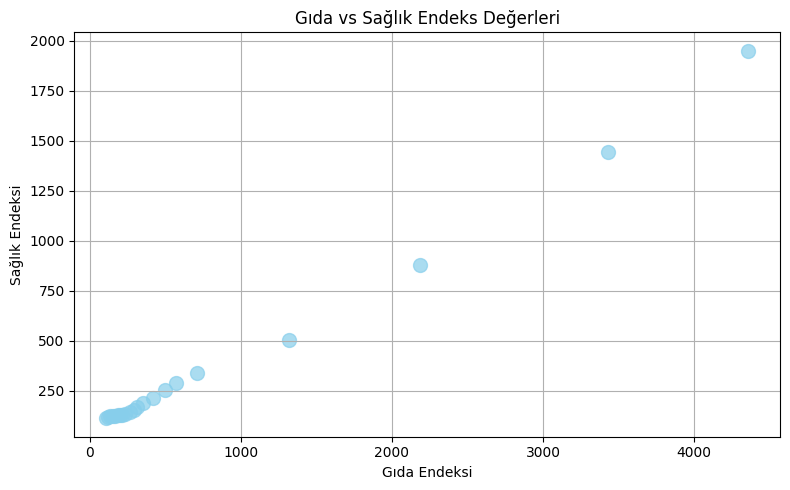

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(korelasyon_data["Endeks_Gıda"], korelasyon_data["Endeks_Sağlık"], alpha=0.7, s=100, color='skyblue')

plt.title("Gıda vs Sağlık Endeks Değerleri")
plt.xlabel("Gıda Endeksi")
plt.ylabel("Sağlık Endeksi")
plt.grid(True)
plt.tight_layout()
plt.show()

Gıda ve Sağlık kategorileri arasında pozitif bir korelasyon var.Bu, gıda fiyatları arttıkça sağlık harcamalarının da arttığını gösteriyor.Enflasyonun her iki kategoriyi de benzer şekilde etkilediğini görebiliyoruz.



### Amaç: Sigorta Kategorisinde Hareketli Ortalama ile Trend Analizi

In [44]:
sigorta_data = df[df["Alt Kategori"] == "(Sigorta)"].copy()

sigorta_data = sigorta_data.sort_values("Tarih")

sigorta_data["12_Aylik_Hareketli_Ort"] = sigorta_data["Endeks"].rolling(window=12).mean()  #12 aylık hareketli ort hesaplama

sigorta_data.head(15)

,Alt Kategori,Yıl,Ay,Endeks,Ay_Num,Tarih,12_Aylik_Hareketli_Ort
21,(Sigorta),2005,Ocak,127.14,1,2005-01-01,NaN
103,(Sigorta),2005,Şubat,130.53,2,2005-02-01,NaN
164,(Sigorta),2005,Mart,128.74,3,2005-03-01,NaN
219,(Sigorta),2005,Nisan,123.83,4,2005-04-01,NaN
245,(Sigorta),2005,Mayıs,122.00,5,2005-05-01,NaN
328,(Sigorta),2005,Haziran,127.27,6,2005-06-01,NaN
369,(Sigorta),2005,Temmuz,126.82,7,2005-07-01,NaN
422,(Sigorta),2005,Ağustos,130.87,8,2005-08-01,NaN
481,(Sigorta),2005,Eylül,132.18,9,2005-09-01,NaN
541,(Sigorta),2005,Ekim,130.54,10,2005-10-01,NaN


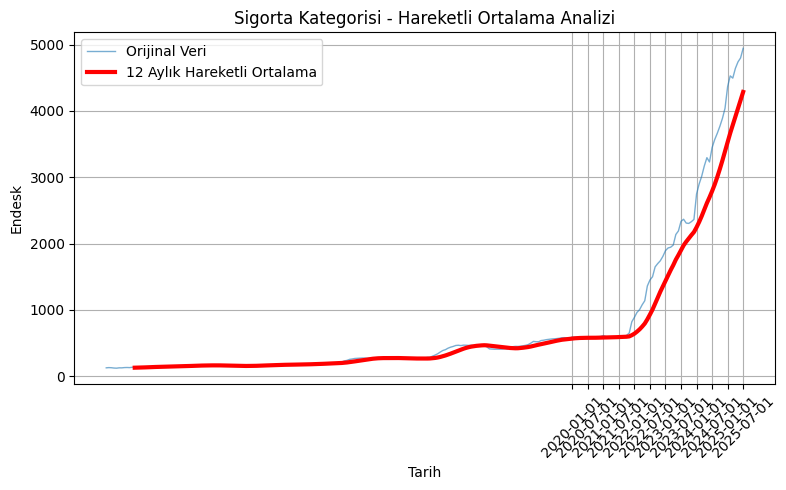

In [51]:
# Son 5 yıllık veriyi alalım (2020-2025)
sigorta_son5yil = sigorta_data[sigorta_data["Yıl"] >= 2020].copy()

plt.figure(figsize=(8,5))
plt.plot(sigorta_data["Tarih"], sigorta_data["Endeks"], 
         label="Orijinal Veri", alpha=0.6, linewidth=1)
plt.plot(sigorta_data["Tarih"], sigorta_data["12_Aylik_Hareketli_Ort"], 
         label="12 Aylık Hareketli Ortalama", linewidth=3, color='red')

plt.title("Sigorta Kategorisi - Hareketli Ortalama Analizi")
plt.xlabel("Tarih")
plt.ylabel("Endesk")
plt.legend()
plt.grid(True)

plt.xticks(sigorta_son5yil["Tarih"][::6], rotation=45)  # [::6] = her 6. tarihi al ,tarih etiketlerini düzenleyelim - sadece 6 ayda bir gösterelim
plt.tight_layout()
plt.show()

Bu hareketli ortalama analizi sonucunda:

1. **Kırmızı çizgi (12 aylık hareketli ortalama)** sigorta kategorisinin uzun vadeli trendini gösteriyor. Bu çizgi, aylık dalgalanmaları yumuşatarak gerçek trendi ortaya çıkarıyor.

2. **Mavi çizgi (orijinal veri)** aylık değişimleri gösteriyor. Bu çizgideki ani yükseliş ve düşüşler, kısa vadeli ekonomik dalgalanmaları yansıtıyor.

3. **2020-2021 döneminde** sigorta endeksinde görece istikrarlı bir seyir izlenirken, **2021 sonrasında** dramatik bir yükseliş trendi başlamış.

4. **2022-2023 döneminde** hareketli ortalama çizgisi neredeyse dikey bir artış gösteriyor, bu da sigorta maliyetlerindeki hızlı artışı işaret ediyor.

5. **2024-2025 döneminde** ise trend yavaşlamaya başlamış, ancak hala yukarı yönlü bir seyir izliyor.

Bu analiz, sigorta kategorisinin enflasyonist baskılardan en çok etkilenen sektörlerden biri olduğunu ve özellikle son 3 yılda rekor artışlar yaşadığını açık şekilde gösteriyor.